In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
csv = pd.read_csv("MNIST+all.csv")
csv = csv.loc[~csv['mode'].str.contains('full')].loc[~csv['mode'].str.contains('one')].loc[~csv['mode'].str.contains('\*a-')]
csv
avg = csv.groupby(['mode', 'scale', 'eta']).mean(['validity', 'fid', 'sfid', 'is', 'precision', 'recall']).reset_index()
avg

,mode,scale,eta,label,validity,fid,sfid,is,precision,recall
0,classifier,0.5,0,4.75,0.917600,14.369603,30.833868,1.659620,0.704956,0.767166
1,classifier,0.5,1,4.75,0.933975,9.291060,23.326696,1.662099,0.745972,0.777802
2,classifier,1.0,0,4.75,0.971800,24.039545,41.070706,1.586094,0.765625,0.614842
3,classifier,1.0,1,4.75,0.980850,11.069356,25.703138,1.581806,0.802856,0.706378
4,classifier,2.0,0,4.75,0.992075,44.536047,64.214186,1.566356,0.768677,0.388685
5,classifier,2.0,1,4.75,0.993550,17.483733,34.477759,1.551182,0.831177,0.624850
6,dynamic-fonly,20.0,0,4.75,0.819575,27.762914,49.219330,1.797036,0.527100,0.814912
7,dynamic-fonly,20.0,1,4.75,0.828725,19.045302,36.681691,1.763472,0.637451,0.799169
8,dynamic-fonly,50.0,0,4.75,0.878300,28.405262,48.892284,1.750949,0.545776,0.785090
9,dynamic-fonly,50.0,1,4.75,0.929450,16.057140,31.262975,1.689968,0.707031,0.772051


In [44]:
# concert avg into a half table such that all eta = 0 and eta = 1 are concated in the same rows some long as the mode, scale are the same
avg = avg.pivot_table(index=['mode', 'scale'], columns='eta', values=['validity', 'fid', 'sfid', 'is', 'precision', 'recall'])
avg = avg.reset_index()
avg.columns = ["_".join([str(t) for t in w if t!='']) for w in avg.columns.values]
avg

,mode,scale,fid_0,fid_1,is_0,is_1,precision_0,precision_1,recall_0,recall_1,sfid_0,sfid_1,validity_0,validity_1
0,classifier,0.5,14.369603,9.291060,1.659620,1.662099,0.704956,0.745972,0.767166,0.777802,30.833868,23.326696,0.917600,0.933975
1,classifier,1.0,24.039545,11.069356,1.586094,1.581806,0.765625,0.802856,0.614842,0.706378,41.070706,25.703138,0.971800,0.980850
2,classifier,2.0,44.536047,17.483733,1.566356,1.551182,0.768677,0.831177,0.388685,0.624850,64.214186,34.477759,0.992075,0.993550
3,dynamic-fonly,20.0,27.762914,19.045302,1.797036,1.763472,0.527100,0.637451,0.814912,0.799169,49.219330,36.681691,0.819575,0.828725
4,dynamic-fonly,50.0,28.405262,16.057140,1.750949,1.689968,0.545776,0.707031,0.785090,0.772051,48.892284,31.262975,0.878300,0.929450
5,dynamic-fonly,100.0,31.391466,17.682849,1.742152,1.665433,0.530518,0.706909,0.744337,0.751244,51.200007,32.926580,0.902100,0.954475
6,dynamic-nog-0.1,20.0,27.568547,18.727568,1.798766,1.761581,0.542603,0.644043,0.817274,0.781205,47.352106,35.275709,0.820550,0.829725
7,dynamic-nog-0.1,50.0,27.524911,15.822985,1.735877,1.680446,0.559692,0.717285,0.793850,0.761035,47.191973,30.479303,0.881700,0.927600
8,dynamic-nog-0.1,100.0,30.485114,17.088218,1.730486,1.662954,0.543335,0.713013,0.742632,0.760127,49.495903,31.844912,0.898075,0.952750
9,dynamic-nog-0.1*a,20.0,27.608676,18.864059,1.801399,1.776681,0.533325,0.635498,0.818706,0.792926,47.794936,35.528359,0.818450,0.826300


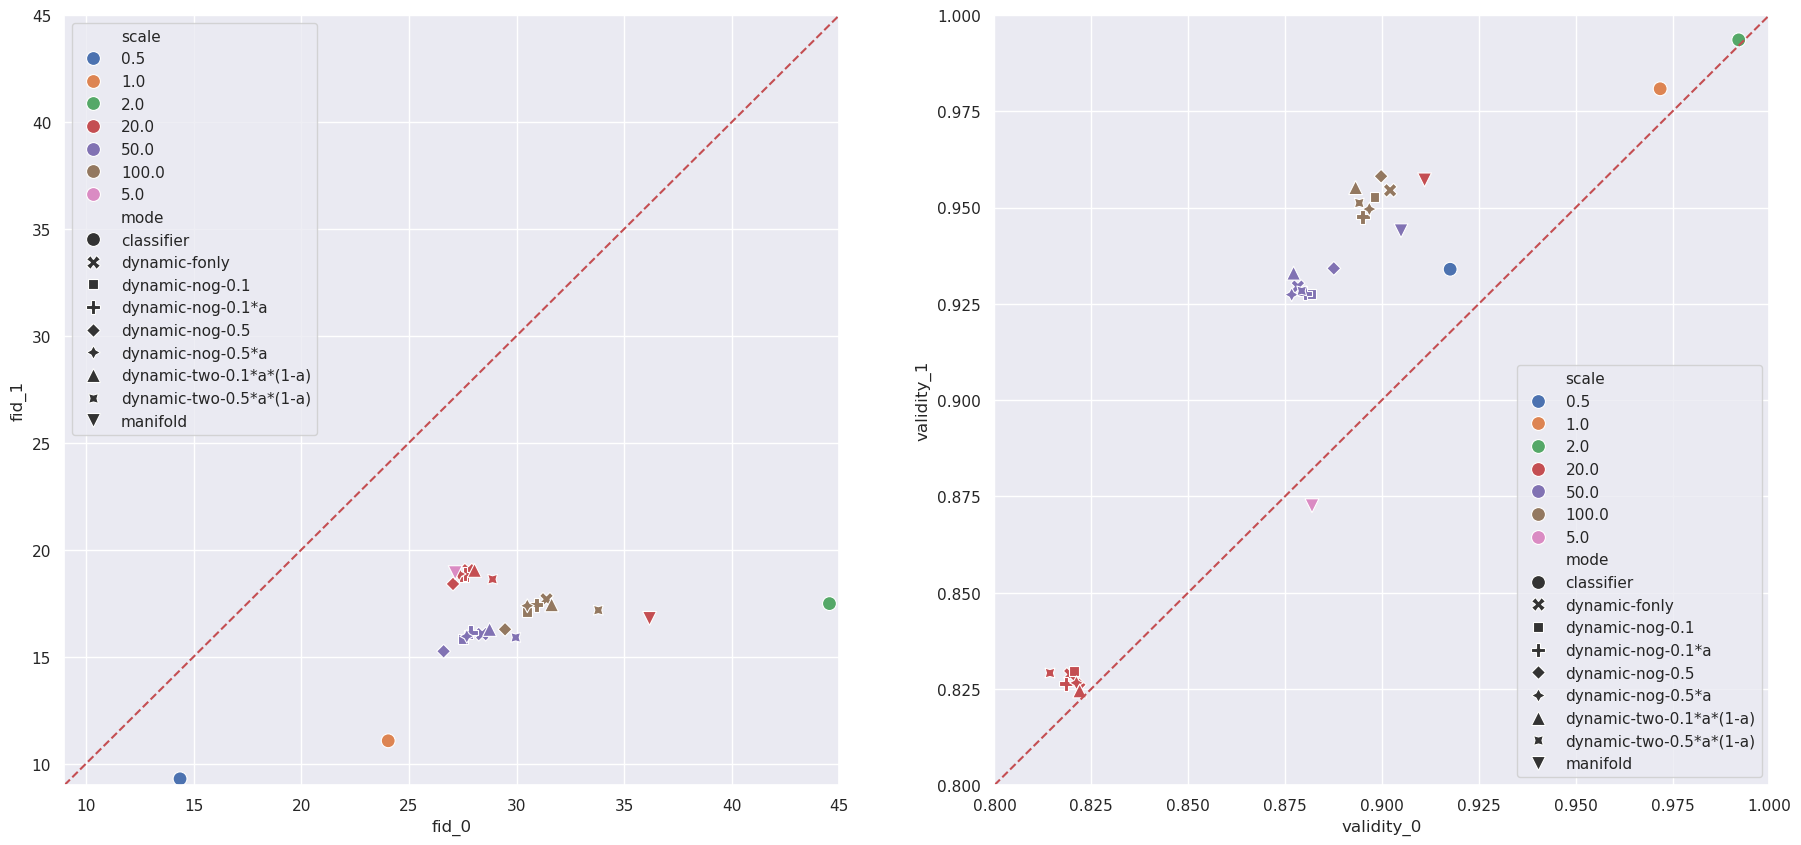

In [75]:
# This is a figure to show that eta plays an important role in the performance of the model
data = avg
# data['scale'] = data['scale'].map(lambda x: str(x))
fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(22, 10), dpi=100)

sns.scatterplot(data=avg, x='fid_0', y='fid_1', hue='scale', style='mode', s=100, ax=axs[0])
axs[0].set_xlim(9,45)
axs[0].set_ylim(9,45)
axs[0].plot([9,45], [9,45], 'r--')
axs[0].legend(loc='upper left')

sns.scatterplot(data=avg, x='validity_0', y='validity_1', hue='scale', style='mode', s=100, ax=axs[1])
axs[1].set_xlim(0.8, 1)
axs[1].set_ylim(0.8, 1)
axs[1].plot([0.8,1], [0.8,1], 'r--')
axs[1].legend(loc='lower right')

<Axes: xlabel='fid', ylabel='validity'>

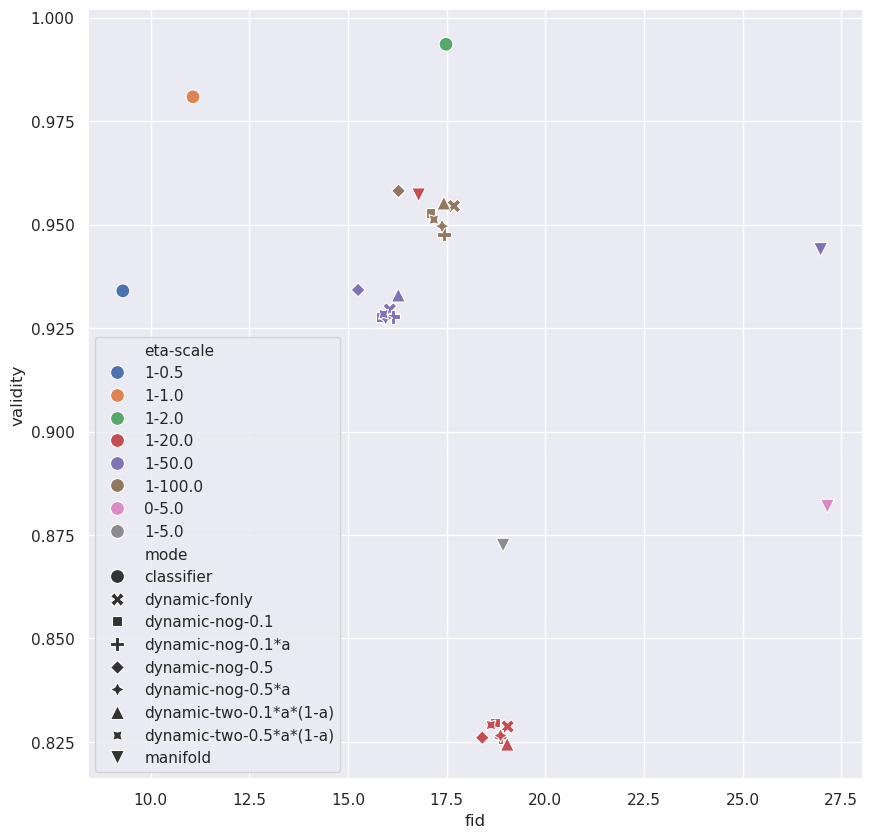

In [5]:
# data = avg.loc[avg['mode'] != 'classifier']
data = avg
data = data.loc[(data['mode'] == 'manifold') | (data['eta'] == 1)]
data = data.loc[data['fid'] < 30]
# combine columns 'scale' and 'eta' into one column
data['eta-scale'] = data['eta'].astype(str) + '-' + data['scale'].astype(str)
# data['scale'] = data['scale'].map(lambda 
# data['scale'] = data['scale'].map(lambda x: str(x))
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(data=data, x='fid', y='validity', hue='eta-scale', style='mode', s=100)